In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [3]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
print(y)

[0.00669285 0.00739154 0.00816257 0.0090133  0.0099518  0.01098694
 0.01212843 0.01338692 0.01477403 0.0163025  0.01798621 0.01984031
 0.02188127 0.02412702 0.02659699 0.02931223 0.03229546 0.03557119
 0.03916572 0.04310725 0.04742587 0.05215356 0.05732418 0.06297336
 0.06913842 0.07585818 0.0831727  0.09112296 0.09975049 0.10909682
 0.11920292 0.13010847 0.14185106 0.15446527 0.16798161 0.18242552
 0.19781611 0.21416502 0.23147522 0.24973989 0.26894142 0.2890505
 0.31002552 0.33181223 0.35434369 0.37754067 0.40131234 0.42555748
 0.450166   0.47502081 0.5        0.52497919 0.549834   0.57444252
 0.59868766 0.62245933 0.64565631 0.66818777 0.68997448 0.7109495
 0.73105858 0.75026011 0.76852478 0.78583498 0.80218389 0.81757448
 0.83201839 0.84553473 0.85814894 0.86989153 0.88079708 0.89090318
 0.90024951 0.90887704 0.9168273  0.92414182 0.93086158 0.93702664
 0.94267582 0.94784644 0.95257413 0.95689275 0.96083428 0.96442881
 0.96770454 0.97068777 0.97340301 0.97587298 0.97811873 0.980159

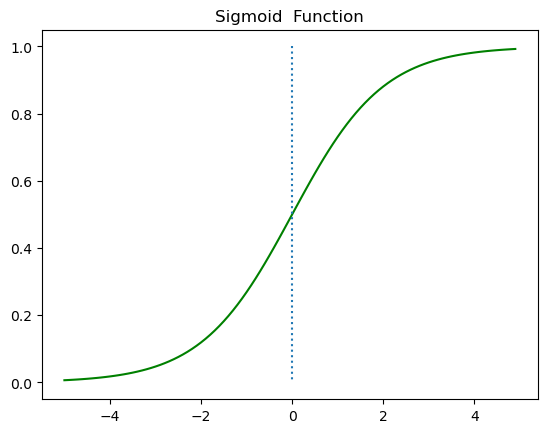

In [4]:
plt.plot(x, y, 'g')
plt.plot([0,0],[1.0, 0.0], ':')
plt.title("Sigmoid  Function")
plt.show()


In [5]:
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

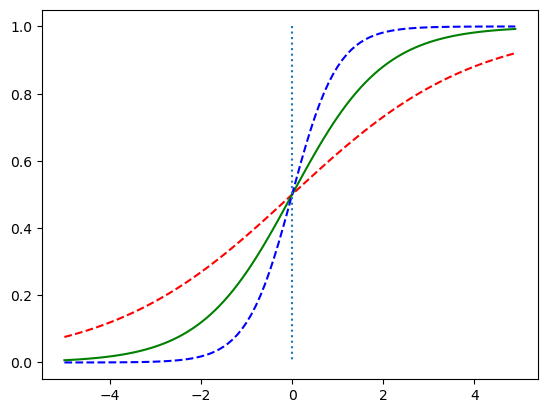

In [6]:
plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0], [1.0, 0.0], ':')
plt.show()


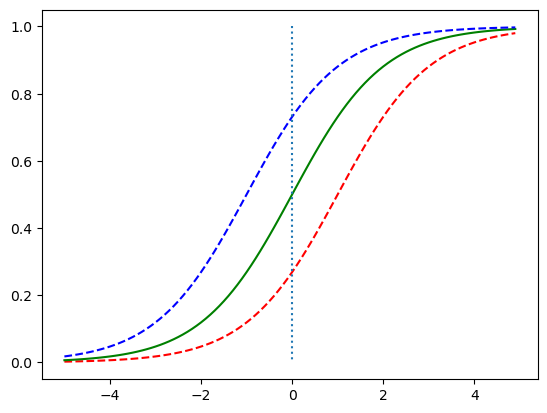

In [7]:
y1 = sigmoid(x-1)
y2 = sigmoid(x)
y3 = sigmoid(x+1)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0], [1.0, 0.0], ':')
plt.show()

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [9]:
torch.manual_seed(1)
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
t_data = [[0],[0],[0],[1],[1],[1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(t_data)
print(x_train.size())
print(y_train.size())


torch.Size([6, 2])
torch.Size([6, 1])


In [10]:
w = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [11]:
optimizer = optim.SGD([w, b], lr=0.1)
costs = []

In [12]:
for epoch in range(2000):
    y = x_train.matmul(w) + b
    h = torch.sigmoid(y)
    cost = -(y_train*torch.log(h) + (1-y_train)*torch.log(1-h)).mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    costs.append(cost.item())

    if epoch % 100 == 0:
        print('epoch :', epoch, 'cost :', cost.item())

epoch : 0 cost : 0.6931471824645996
epoch : 100 cost : 0.41432666778564453
epoch : 200 cost : 0.34952056407928467
epoch : 300 cost : 0.3013016879558563
epoch : 400 cost : 0.26353225111961365
epoch : 500 cost : 0.23351818323135376
epoch : 600 cost : 0.20931296050548553
epoch : 700 cost : 0.1894957274198532
epoch : 800 cost : 0.17303510010242462
epoch : 900 cost : 0.15917940437793732
epoch : 1000 cost : 0.14737461507320404
epoch : 1100 cost : 0.1372075080871582
epoch : 1200 cost : 0.1283654123544693
epoch : 1300 cost : 0.12060842663049698
epoch : 1400 cost : 0.1137501522898674
epoch : 1500 cost : 0.10764380544424057
epoch : 1600 cost : 0.10217245668172836
epoch : 1700 cost : 0.0972420871257782
epoch : 1800 cost : 0.09277603030204773
epoch : 1900 cost : 0.08871141821146011


In [13]:
h2 = torch.sigmoid(x_train.matmul(w)+b)
h2


tensor([[0.0090],
        [0.1107],
        [0.1722],
        [0.8509],
        [0.9748],
        [0.9924]], grad_fn=<SigmoidBackward0>)

In [14]:
predict = (h2 > torch.FloatTensor([0.5])).float()
predict

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])

In [15]:
print(w)
print(b)

tensor([[1.9130],
        [0.6995]], requires_grad=True)
tensor([-8.0084], requires_grad=True)


In [16]:
model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

In [17]:
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [18]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
for epoch in range(2001):
    h = model(x_train)
    cost = F.binary_cross_entropy(h, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        predict = h >= torch.FloatTensor([0.5]).float()  # 예측값이 0.5를 넘으면 True로 간주
        correct_pre = predict ==  y_train  # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_pre.sum().item() / len(correct_pre)  # 정확도 계산

        print('Epoch :', epoch, 'Cost : ', cost.item(), '   Accuracy : ', accuracy*100)



Epoch : 0 Cost :  0.5397130846977234    Accuracy :  83.33333333333334
Epoch : 100 Cost :  0.4076883792877197    Accuracy :  83.33333333333334
Epoch : 200 Cost :  0.34564945101737976    Accuracy :  83.33333333333334
Epoch : 300 Cost :  0.29832255840301514    Accuracy :  83.33333333333334
Epoch : 400 Cost :  0.26117900013923645    Accuracy :  83.33333333333334
Epoch : 500 Cost :  0.2316325306892395    Accuracy :  100.0
Epoch : 600 Cost :  0.20777933299541473    Accuracy :  100.0
Epoch : 700 Cost :  0.18822990357875824    Accuracy :  100.0
Epoch : 800 Cost :  0.17197585105895996    Accuracy :  100.0
Epoch : 900 Cost :  0.15828156471252441    Accuracy :  100.0
Epoch : 1000 Cost :  0.1466050148010254    Accuracy :  100.0
Epoch : 1100 Cost :  0.13654100894927979    Accuracy :  100.0
Epoch : 1200 Cost :  0.12778277695178986    Accuracy :  100.0
Epoch : 1300 Cost :  0.12009505182504654    Accuracy :  100.0
Epoch : 1400 Cost :  0.11329448223114014    Accuracy :  100.0
Epoch : 1500 Cost :  0.107

In [19]:
# model(torch.FloatTensor([[3,1], [8,5]]))
(model(torch.FloatTensor([[3,1], [8,5]])) > torch.FloatTensor([0.5])).float()

tensor([[0.],
        [1.]])

In [20]:
# AND 게이트
x_data = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
y_data = torch.FloatTensor([[0],[0],[0],[1]])

# OR 게이트
x_data = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
y_data = torch.FloatTensor([[0],[1],[1],[1]])

# NAND 게이트
x_data = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
y_data = torch.FloatTensor([[1],[1],[1],[0]])

# XOR 게이트(베타적 OR 게이트)
x_data = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
y_data = torch.FloatTensor([[0],[1],[1],[0]])